In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [3]:
# To install tensorflow, uncomment the following line:

"""
! conda install -c conda-forge tensorflow --y
"""

'\n! conda install -c conda-forge tensorflow --y\n'

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
from keras.regularizers import l2
import keras.backend as K
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras import regularizers

In [5]:
# Uncomment to install kaggle API and unzip command
# Remember to generate API token on Kaggle website and save it to .kaggle folder in your home directory

"""
! conda install -c conda-forge kaggle --y
"""

# Uncomment to install unzip command line tools (only for unix-like systems)

"""
! conda install -c conda-forge p7zip --y
"""

'\n! conda install -c conda-forge p7zip --y\n'

In [6]:
# We retrieve the dataset from Kaggle API

! kaggle datasets download -d ruthgn/beer-profile-and-ratings-data-set

beer-profile-and-ratings-data-set.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
# Unpacking the file with comand line unzip (Only works in unix-like systems, in Windows unzip manually)

! 7za e beer-profile-and-ratings-data-set.zip "beer_profile_and_ratings.csv" -y


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=es_AR.UTF-8,Utf16=on,HugeFiles=on,64 bits,6 CPUs x64)

Scanning the drive for archives:
  0M Sca        1 file, 504214 bytes (493 KiB)

Extracting archive: beer-profile-and-ratings-data-set.zip
--
Path = beer-profile-and-ratings-data-set.zip
Type = zip
Physical Size = 504214

    Everything is Ok

Size:       1249676
Compressed: 504214


In [8]:
df = pd.read_csv('beer_profile_and_ratings.csv')

In [9]:
# We split the continuous score into two categories

def remapeo(cal):
    if cal  <= 3:
        return 0
    elif cal > 3:
        return 1


# We apply the mapping function to the score column of the dataset:

df['review_overall'] = df['review_overall'].apply(remapeo)

In [10]:
df['review_overall'].value_counts()

1    2960
0     237
Name: review_overall, dtype: int64

In [11]:
# Since word count for every feature is computed with up to 25 reviews, we eliminate rows with less than 25 reviews to avoid artificially low word counts.

mask_few_reviews = df['number_of_reviews'] > 24
df = df[mask_few_reviews]

In [12]:
df.shape

(2363, 25)

In [13]:
df.head()

,Name,Style,Brewery,Beer Name (Full),Description,ABV,Min IBU,Max IBU,Astringency,Body,...,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
0,Amber,Altbier,Alaskan Brewing Co.,Alaskan Brewing Co. Alaskan Amber,"Notes:Richly malty and long on the palate, wit...",5.3,25,50,13,32,...,33,57,8,111,3.498994,3.636821,3.556338,3.643863,1,497
1,Double Bag,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Double Bag,"Notes:This malty, full-bodied double alt is al...",7.2,25,50,12,57,...,24,35,12,84,3.798337,3.846154,3.904366,4.024948,1,481
2,Long Trail Ale,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Long Trail Ale,Notes:Long Trail Ale is a full-bodied amber al...,5.0,25,50,14,37,...,10,54,4,62,3.409814,3.667109,3.600796,3.631300,1,377
3,Doppelsticke,Altbier,Uerige Obergärige Hausbrauerei GmbH / Zum Uerige,Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...,Notes:,8.5,25,50,13,55,...,49,40,16,119,4.148098,4.033967,4.150815,4.205163,1,368
4,Sleigh'r Dark Doüble Alt Ale,Altbier,Ninkasi Brewing Company,Ninkasi Brewing Company Sleigh'r Dark Doüble A...,Notes:Called 'Dark Double Alt' on the label.Se...,7.2,25,50,25,51,...,11,51,20,95,3.625000,3.973958,3.734375,3.765625,1,96


In [14]:
df = pd.get_dummies(df, columns=['Style'], drop_first=True)

In [15]:
X = df[['ABV', 'Min IBU', 'Max IBU', 'Astringency', 'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty', 'Style_Barleywine - American', 'Style_Barleywine - English', 'Style_Bitter - English', 
 'Style_Bitter - English Extra Special / Strong Bitter (ESB)', 'Style_Bière de Champagne / Bière Brut', 'Style_Blonde Ale - American', 'Style_Blonde Ale - Belgian', 'Style_Bock - Doppelbock', 'Style_Bock - Eisbock', 
 'Style_Bock - Maibock', 'Style_Bock - Traditional', 'Style_Bock - Weizenbock', 'Style_Braggot', 'Style_Brett Beer', 'Style_Brown Ale - American', 'Style_Brown Ale - Belgian Dark', 'Style_Brown Ale - English', 'Style_California Common / Steam Beer', 
 'Style_Chile Beer', 'Style_Cream Ale', 'Style_Dubbel', 'Style_Farmhouse Ale - Bière de Garde', 'Style_Farmhouse Ale - Sahti', 'Style_Farmhouse Ale - Saison', 'Style_Fruit and Field Beer', 'Style_Gruit / Ancient Herbed Ale', 'Style_Happoshu',     
 'Style_Herb and Spice Beer', 'Style_IPA - American', 'Style_IPA - Belgian', 'Style_IPA - Black / Cascadian Dark Ale', 'Style_IPA - English', 'Style_IPA - Imperial', 'Style_IPA - New England', 'Style_Kvass', 'Style_Kölsch', 
 'Style_Lager - Adjunct', 'Style_Lager - American', 'Style_Lager - American Amber / Red', 'Style_Lager - European / Dortmunder Export', 'Style_Lager - European Dark', 'Style_Lager - European Pale', 'Style_Lager - European Strong', 'Style_Lager - Helles',      
 'Style_Lager - India Pale Lager (IPL)', 'Style_Lager - Japanese Rice', 'Style_Lager - Kellerbier / Zwickelbier', 'Style_Lager - Light', 'Style_Lager - Malt Liquor', 'Style_Lager - Munich Dunkel', 'Style_Lager - Märzen / Oktoberfest', 
 'Style_Lager - Rauchbier', 'Style_Lager - Schwarzbier', 'Style_Lager - Vienna', 'Style_Lambic - Faro', 'Style_Lambic - Fruit', 'Style_Lambic - Gueuze', 'Style_Lambic - Traditional', 'Style_Low Alcohol Beer', 'Style_Mild Ale - English Dark', 
 'Style_Mild Ale - English Pale', 'Style_Old Ale', 'Style_Pale Ale - American', 'Style_Pale Ale - Belgian', 'Style_Pale Ale - English', 'Style_Pilsner - Bohemian / Czech', 'Style_Pilsner - German', 'Style_Pilsner - Imperial', 'Style_Porter - American', 
 'Style_Porter - Baltic', 'Style_Porter - English', 'Style_Porter - Imperial', 'Style_Porter - Robust', 'Style_Porter - Smoked', 'Style_Pumpkin Beer', 'Style_Quadrupel (Quad)', 'Style_Red Ale - American Amber / Red', 'Style_Red Ale - Imperial', 
 'Style_Red Ale - Irish', 'Style_Rye Beer', 'Style_Rye Beer - Roggenbier', 'Style_Scotch Ale / Wee Heavy', 'Style_Scottish Ale', 'Style_Smoked Beer', 'Style_Sour - Berliner Weisse', 'Style_Sour - Flanders Oud Bruin', 'Style_Sour - Flanders Red Ale', 
 'Style_Sour - Gose', 'Style_Stout - American', 'Style_Stout - American Imperial', 'Style_Stout - English', 'Style_Stout - Foreign / Export', 'Style_Stout - Irish Dry', 'Style_Stout - Oatmeal', 'Style_Stout - Russian Imperial', 'Style_Stout - Sweet / Milk', 
 'Style_Strong Ale - American', 'Style_Strong Ale - Belgian Dark', 'Style_Strong Ale - Belgian Pale', 'Style_Strong Ale - English', 'Style_Tripel', 'Style_Wheat Beer - American Dark', 'Style_Wheat Beer - American Pale', 'Style_Wheat Beer - Dunkelweizen', 
 'Style_Wheat Beer - Hefeweizen', 'Style_Wheat Beer - Kristallweizen', 'Style_Wheat Beer - Wheatwine', 'Style_Wheat Beer - Witbier', 'Style_Wild Ale', 'Style_Winter Warmer']]

y = df["review_overall"]

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=12, test_size=0.2, shuffle=True)

In [17]:
print(y_train.value_counts())

1    1775
0     115
Name: review_overall, dtype: int64


In [18]:
print(y_test.value_counts())

1    444
0     29
Name: review_overall, dtype: int64


In [19]:
# Uncomment if you don't have the package installed.

"""
! conda install -c conda-forge imbalanced-learn --y
"""

'\n! conda install -c conda-forge imbalanced-learn --y\n'

In [20]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

counter = Counter(y_train)
print('Before', counter)

oversampler=RandomOverSampler(sampling_strategy='minority', random_state=123)

X_train,y_train=oversampler.fit_resample(X_train,y_train)

counter = Counter(y_train)
print('After', counter)


Before Counter({1: 1775, 0: 115})
After Counter({1: 1775, 0: 1775})


In [21]:
X_train.shape

(3550, 124)

In [22]:
y_train.value_counts()

0    1775
1    1775
Name: review_overall, dtype: int64

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
X_train_scaled.shape

(3550, 124)

In [25]:
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

In [26]:
X_train_scaled.shape

(3550, 124)

In [27]:
model = Sequential()
model.add(Dense(48, input_shape = (124, ), activation = "relu")) 
model.add(Dense(24, activation = "relu", kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(2, activation = "softmax"))
model.compile(Adam(lr = 0.001), "categorical_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                6000      
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1176      
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 50        
Total params: 7,226
Trainable params: 7,226
Non-trainable params: 0
_________________________________________________________________


In [28]:
from keras.callbacks import ModelCheckpoint

history = model.fit(X_train_scaled, y_train, verbose=1, epochs=100, validation_data=(X_test_scaled, y_test), callbacks = [EarlyStopping(monitor='val_accuracy', mode = 'max', patience=20),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', mode = 'max', save_best_only=True)])

Epoch 1/100
111/111 [==============================] - 1s 7ms/step - loss: 0.8158 - accuracy: 0.7304 - val_loss: 0.4770 - val_accuracy: 0.8985
Epoch 2/100
111/111 [==============================] - 0s 4ms/step - loss: 0.4100 - accuracy: 0.9175 - val_loss: 0.4082 - val_accuracy: 0.8922
Epoch 3/100
111/111 [==============================] - 1s 4ms/step - loss: 0.3187 - accuracy: 0.9399 - val_loss: 0.3548 - val_accuracy: 0.9091
Epoch 4/100
111/111 [==============================] - 0s 3ms/step - loss: 0.2576 - accuracy: 0.9436 - val_loss: 0.3083 - val_accuracy: 0.9154
Epoch 5/100
111/111 [==============================] - 0s 3ms/step - loss: 0.2273 - accuracy: 0.9431 - val_loss: 0.3135 - val_accuracy: 0.9091
Epoch 6/100
111/111 [==============================] - 0s 4ms/step - loss: 0.2008 - accuracy: 0.9550 - val_loss: 0.2702 - val_accuracy: 0.9281
Epoch 7/100
111/111 [==============================] - 0s 3ms/step - loss: 0.1695 - accuracy: 0.9631 - val_loss: 0.2706 - val_accuracy: 0.9239

In [29]:
from keras.models import load_model

saved_model = load_model('best_model.h5')


In [30]:
from sklearn.metrics import confusion_matrix

y_pred_NN = np.argmax(saved_model.predict(X_test_scaled), axis=-1)
y_test_NN = np.argmax(y_test, axis=1)
confusion_matrix(y_test_NN, y_pred_NN)

array([[ 24,   5],
       [ 10, 434]])

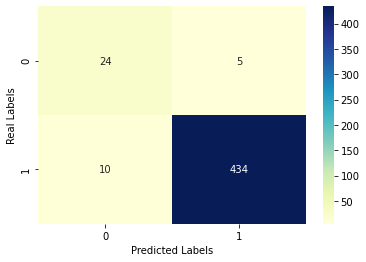

In [31]:
confusion_matrix(y_test_NN, y_pred_NN)
sns.heatmap(confusion_matrix(y_test_NN, y_pred_NN), annot=True, fmt='.0f', cmap='YlGnBu',  xticklabels=[0,1],  yticklabels=[0,1] )
plt.ylabel('Real Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [32]:
print(classification_report(y_test_NN, y_pred_NN))

              precision    recall  f1-score   support

           0       0.71      0.83      0.76        29
           1       0.99      0.98      0.98       444

    accuracy                           0.97       473
   macro avg       0.85      0.90      0.87       473
weighted avg       0.97      0.97      0.97       473



In [33]:
from sklearn.metrics import f1_score

print(f1_score(y_test_NN, y_pred_NN))

0.9830124575311437


In [34]:
from sklearn.metrics import recall_score

recall_score(y_test_NN, y_pred_NN)

0.9774774774774775

In [35]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test_NN, y_pred_NN)

0.9682875264270613

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


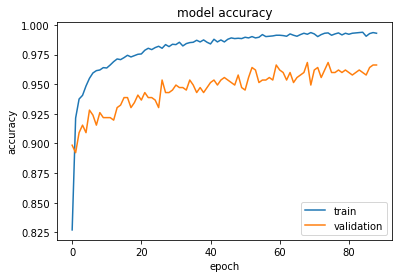

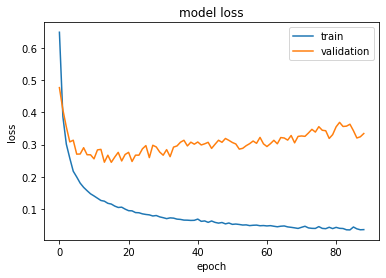

In [36]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [37]:
historia = pd.DataFrame(history.history)

In [38]:
historia.sort_values('val_accuracy', ascending=False).head(5)

,loss,accuracy,val_loss,val_accuracy
68,0.041024,0.992113,0.305372,0.968288
74,0.039203,0.993239,0.338826,0.968288
88,0.035531,0.992958,0.334310,0.966173
87,0.035046,0.993521,0.324200,0.966173
59,0.048145,0.991268,0.302206,0.966173


In [39]:

from sklearn.metrics import roc_auc_score

roc_auc_score(y_test_NN, y_pred_NN)


0.9025318421870145

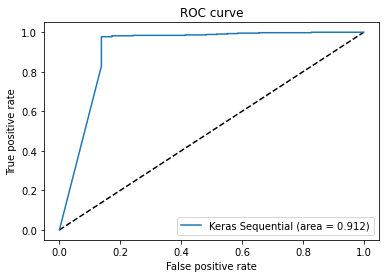

In [40]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_pred_keras = saved_model.predict(X_test_scaled)[:,1]

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test_NN, y_pred_keras)

auc_keras = auc(fpr_keras, tpr_keras)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras Sequential (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()